# Projekt - Analiza zbioru danych na podstawie Students Performance in Exams
Bartosz Glądała

### Wstęp
Do analizy danych w projekcie wybrano zbiór Students Performance in Exams w oparciu o stronę https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv. Dane zawierają informacje o wynikach studentów z egzaminów w Stanach Zjednoczonych w zależności od czynników społecznych. Każdy rekord jest opisany za pomocą takich wyznaczników jak na przykład: wykształcenie rodziców, pochodzenie etniczne, płeć.

W ramach zadania część wykresów została przedstawiona w sposób interaktywny, co było jednym z punktów projektu. Po najechaniu na wykres wyświetlają się dodatkowe informacje dla użytkownika.


### Przygotowanie zabioru danych
Pierwszym etapem analizy zbioru będzie przedstawienie zawartych w nich informacji oraz określenie jego budowy. W ramach przygotowania będzie wykonane ewentualne czyszczenie danych, jeżeli zbiór będzie tego potrzebował.

Poniżej zaimportowano wszystkie wymagane biblioteki do wykonania pełnej analizy zbioru.

In [28]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Pobranie zbioru danych z pliku csv oraz zapisanie go w formie data frame za pomocą biblioteki pandas

In [29]:
df = pd.read_csv("StudentsPerformance.csv")

Wyświetlenie pięć losowych rekordów ze zbioru

In [30]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
869,male,group C,associate's degree,free/reduced,none,49,51,51
324,female,group C,high school,free/reduced,none,41,46,43
747,male,group C,some college,standard,none,69,64,68
977,male,group C,associate's degree,standard,none,62,65,58
888,female,group D,some college,free/reduced,none,69,65,74


Sprawdzenie rozmiaru zbioru

In [31]:
df.shape

(1000, 8)

Wyświetlenie informacji dotyczących kolumn opisujących każdy rekord

In [32]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Na podstawie powyższych informacji można stwierdzić, że zbiór posiada 1000 rekordów, a każdy rekord zawiera informacje określone w 8 kolumnach, które zostały opisane poniżej:

1. Gender - płeć
2. Race/ethnicity - pochodzenie etniczne
3. Parental level of education - poziom wykształcenia rodziców,
4. Lunch - rodzaj obiadu spożywany przez studenta
5. Test preparation course - ukończenie lub brak ukończenia kursu przygotowawczego do egzaminu
6. Math score - wynik z matematyki
7. Reading score - wynik z egzaminu części czytanej
8. Writing score - wynik z egzaminu części pisemnej

Kolejnym krokiem jest wyświetlenie informacji ogólnych o zbiorze - informacje o brakach, jak również typ danych dla każdej kolumny. Za pomocą metody describe() wygenerowano statystki opisowe, które zawierają informację o tendencji centralnej, rozproszeniu oraz kształcie zbioru z wyłączeniem wartości nieliczbowych. 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Z informacji pozyskanych za pomocą metody info() można stwierdzić, że nie istnieją braki w jakiejkolwiek kolumnie. Z tego powodu nie jest wymagane czyszczenie danych, które miałoby uzupełnić ewentualne braki. Jedynymi danymi liczbowymi w kolumnach są wyniki z egzaminów z matematyki, czytania oraz pisania.

W celu potwierdzenia informacji o brakach zostanie wywołana metoda do sprawdzenia wartości zerowych w kolumnach. Dodatkowo zostaną sprawdzone wartości unikatowe w każdej z kolumn.

In [35]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
#sprawdzenie czy dane są unikalne
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Kolejnym krokiem w analizie będzie rysowanie wykresów w celu zaprezentowania różnych zależności zachodzących w zbiorze danych. 
Do rysowania wykresów różnego typu wykorzystano bibliotekę plotly oraz seaborn. 
Pierwszym z prezentowanych wykresów będzie sprawdzenie stosunku liczbowego ilościowego oraz procentowego
obu płci za pomocą wykresu typu pie.

In [37]:
labels = ['Female', 'Male']
data=df['gender'].value_counts()
fig = px.pie(df, values=data, names=labels)
fig.show()

W badaniu przeważają nieznaczną różnicą kobiety nad mężczyznami. Kolejnym krokiem będzie sprawdzenie liczby osób przynależących do każdej z grupy etnicznej. 

Do tego celu posłużono się wykresem typu histogram.


In [38]:
fig = px.histogram(df, x="race/ethnicity")
fig.show()

Z wykresu wynika, że najlicznieją grupą w zbiorze jest C oraz D mając znaczną przewagą nad resztą. 
Najbardziej liczebnie odstającą grupą etniczną jest grupa A.

Kolejnym krokiem będzie sprawdzenie liczebnie poziomu wykształcenia rodziców.

In [39]:
data = df['parental level of education'].value_counts().sort_index()[::-1]
fig = px.bar(df, x=data, y=data.index, orientation='h',                  
             labels={
                     "x": "",
                     "y": "",
                 },)
fig.update_layout(
    title_text="Parental level of eduaction",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)
fig.show()

Z wykresu słupkowego o poziomie wykształcenia rodziców wynika, że wykształcenie wyższe(magisterskie oraz licencjackie) wśród rodziców jest najmniej popularne, natomiast największą popularnością cieszy się wykształcenie średnie oraz Associate's degree.
Associate's degree jest to wykształcenie dostępne w Stanach Zjednoczonych. Wykształcenie to ma pomóc w przygotowaniu do przyszłego zawodu. Zdobycie tego tytułu jest łatwiejsze niż zdobycie tytułu licencjata.

Następnie przedstawiono poziom wykształcenia rodziców na tle poszczególnych grup etnicznych. Do tego celu posłużono się dwoma typami interakcyjnych wykresów: treemap oraz sunburst.

In [40]:
df['total'] = 1
fig = px.treemap(df, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()

In [41]:
fig = px.sunburst(df, path=['race/ethnicity', 'parental level of education'], values='total')
df = df.drop(['total'], axis  = 1)
fig.show()

Za pomocą interaktywnych wykresów z łatwością można sprawdzić liczbowo poszczególny poziom wykształcenia rodziców dla każdej z grup.

Z wykresu wynika, że najwięcej osób z wykształceniem wyższym znajduje się w grupach D oraz C, a z wykształceniem średnim również w C i D. Jest to spowodowane przewagą liczebną obu grup nad resztą.

Poniżej przedstawiono wykres typu histogram w celu zaprezentowania odbycia kursu przygotowawczego w poszczególnych grupach.

In [42]:
fig = px.histogram(df, x="race/ethnicity", color = 'test preparation course')
fig.show()

Z wykresu można stwierdzić, że ponad połowa studentów w każdej grupie nie odbyła kursu przygotowawczego przed podejściem do egzaminu.

Najlepsza sytuacja w odbyciu kursu przygotowawczego ma miejsce w grupa C oraz E. Najgorsza sytuacja dotyczy ponownie grupy A. Przy analizie należy również zwrócić uwagę na liczebność każdej z grup.

W tym momencie przejdziemy do danych numerycznych, które w zbiorze określone są jako wyniki testów z matematyki, pisania oraz czytania. Do zaprezentowania wyników posłużono się wykresem rozkładu z biblioteki seaborn.

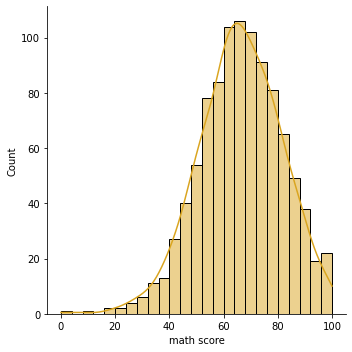

In [43]:
sns.displot(df['math score'], kde=True, color = 'goldenrod')

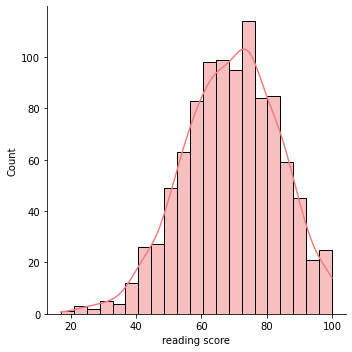

In [44]:
sns.displot(df['reading score'], kde=True, color = 'lightcoral')

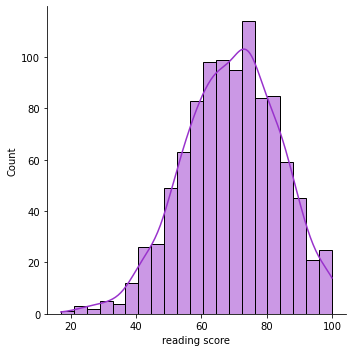

In [45]:
sns.displot(df['reading score'], kde=True, color = 'darkorchid')

W każdym z przypadków można zauważyć, że najbardziej liczna grupa studentów osiągała wyniki pomiędzy 60, a 80. Wartość prawdopodobieństwa rozkładu normalnego w przypadku matematyki jest niższa w porównaniu do egzaminu z pisania oraz czytania. Można zatem stwierdzić, że dobre wyniki z matematyki były najcięższe do osiągniecia.

Kolejnym typem wykresu prezentowanym poniżej będzie pairplot, który będzie miał za zadanie zaprezentowanie różnych zależności uwzględniając wszystkie typy egzaminów oraz płeć studentów.

In [46]:
fig = px.scatter_matrix(df,
    dimensions=["math score", "reading score", "writing score"],color="gender")
fig.show()

Z wykresu można odczytać predyspozycje płci z poszczególnych egzaminów, 
jak również zauważyć zależność otrzymania dobrego wyniku z egzaminu.

Analizując wykres można zauważyć dużą relację pomiędzy dobrym wynikiem z części pisemnej jak i czytanej.

Do sprawdzenia tej hipotezy posłużono się typem wykresu heatmap.

In [47]:
correlation = df.corr()
fig = px.imshow(correlation,color_continuous_scale='viridis')
fig.show()

Z wykresu wynika, że jest duża relacja pomiędzy dobrym wynikiem z pisania oraz czytania, ponieważ współczynik korelacji wynosi 0,95.
Zależność opisująca dobry wynik z egzaminu z matematyki odnoszący się do pozostałych dwóch egzaminów jest mniejsza i wynosi około 0,80 wartości współczynnika korelacji.

Następnie sprawdzono wpływ poziomu wykształcenia rodziców na otrzymane rezulaty z egzaminów.

In [48]:
fig = px.scatter(df, x='writing score', y='reading score', color='parental level of education', opacity=0.5)
fig.show()

Nachodząc na wybrane kropki można sprawdzić jaki wynik osiągnął student z pisania oraz czytania ze względu na poziom wykształcenia swoich rodziców. Analizując kropki z najniższymi wynikami można zauważyć, że są to zazwyczaj studenci, których rodzice mają tylko średnie wykształcenie. 

Kolejnym krokiem analizy było wyciągnięcie średniej z trzech wyników egzaminu oraz dodanie do wykorzystywanego zbioru danych.

In [49]:
df["mean score"] = ((df['math score'] + df["reading score"] + df["writing score"]) / 3).round()
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66,58.0
693,female,group D,associate's degree,standard,none,77,77,73,76.0
572,female,group C,some college,standard,none,53,62,56,57.0
792,male,group D,high school,free/reduced,none,66,74,69,70.0
229,female,group C,some college,standard,completed,88,95,94,92.0


Następnie za pomocą biblioteki sklearn zakodowano dane tekstowe na liczbowe. Operacja ma na celu możliwość przejścia do bardziej złożonych analiz opartych wyłącznie na liczbach.

In [50]:
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
106,0,3,3,1,1,87,100,100,96.0
880,1,2,1,1,0,63,64,66,64.0
477,1,3,0,1,1,80,68,72,73.0
288,1,1,1,0,1,88,75,76,80.0
485,1,2,2,1,1,70,74,71,72.0


Do zaprezentowania uśrednionych wyników z egzaminu na podstawie pochodzenia etnicznego posłużono się wykresem pudełkowym.

In [51]:
fig = px.box(df, x='race/ethnicity', y='mean score', color="gender")
fig.show()

Z wykresu typu pudełkowego możemy odczytać dla każdej grupy etnicznej wartość minimalną oraz mayksymalną, medianę, a także pierwszy i trzeci kwartał pudełka. Dodatkowo poza wąsami czasami znajdują się kropki. Są to wartości które znacznie odbiegają od tych które zostały wzięte do skontruowania pudełka. Im dłuższe pudełko tym dane są bardziej rozproszone.

Ostatnim z wykorzystanych wykresów w projekcie będzie wykres typu violin. Do zaprezentowania zależności poziomu wykształcenia rodziców do uśrednionego wyniku ze wszystkich egzaminów.

In [52]:
fig = px.violin(df, x='parental level of education', y='mean score', 
                color='gender')
fig.show()

### Wnioski

W projekcie przeanalizowano zbiór danych dotyczący wyników z egzaminów w Stanach Zjednocznych ze względu na czynniki społeczne.
W ramach analizy przedstawiono wykresu różnego typu, które miały pokazać zachodzące zależności. Ważnym czynnikiem wpływajacym na wyniki z egzaminów jest poziom wykształcenia rodziców oraz pochodzenie etniczne. Nie mniejszą wagę ma również odbycie kursu przygotowawczego do egzaminu.

Największe zależności w otrzymanych wynikach z egzaminów zauważono przy porównaniu wyników z częsci pisemnej i czytanej. Dla wszystkich studentów najciężej było osiągnać dobre wyniki z egzaminu z matematyki. Porównując wyniki egzaminów dla obu grup - kobiet i mężczyzn, łatwo można zauważyć, że to kobiety osiągają lepsze wyniki niż mężczyźni.

Do prezentacji wyników posłużono się bibliotekami plotly oraz seaborn. Do bardziej zaawansowanej analizy posłużono się biblioteką sklearn, która pozwoliła przekształcić dane tekstowe na dane numeryczne. Z ich pomocą można było narysować wykresy oparte wyłącznie na danych liczbowych.

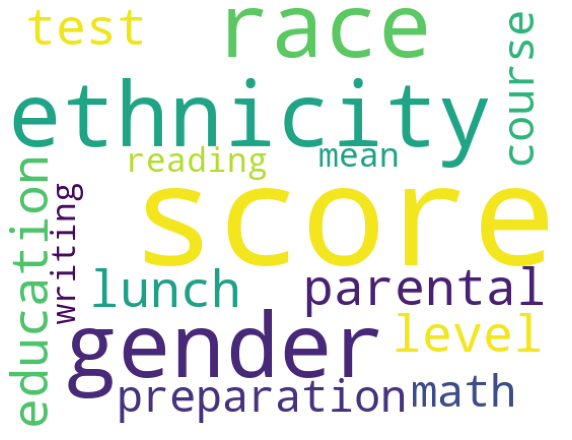

In [53]:
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color='white',
    width=550,
    height=420).generate(' '.join(df))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()